# HW - Natural language processing

In [1]:
#-----------------------------
# Natural Language Toolkit 
import nltk
nltk.download('punkt')
sent_tokenizer=nltk.data.load('tokenizers/punkt/english.pickle')
nltk.download('averaged_perceptron_tagger')
nltk.download('gutenberg')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize, WordPunctTokenizer
from nltk.stem import PorterStemmer
import requests #web
from collections import Counter #counting words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
nltk.download('wordnet')
import re
import string 
#-----------------------------
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
import time
#-----------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (9.71,6)
import matplotlib.cm as cm
import seaborn as sns; 
sns.axes_style("whitegrid")
sns.set_context("talk")
np.random.seed(0)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## We are going to load from the corpus from NLTK

In [2]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

We can load each of the text with the following command:

In [3]:
raw_text  = nltk.corpus.gutenberg.raw('austen-persuasion.txt')        
print(raw_text[:150])

[Persuasion by Jane Austen 1818]


Chapter 1


Sir Walter Elliot, of Kellynch Hall, in Somersetshire, was a man who,
for his own amusement, never took


## Exercise 1

Create a python function to pre-process a text including the following steps:

1. Load the raw text.
2. Split into tokens.
3. Convert to lowercase.
4. Filter out tokens that are not alphabetic.
5. Filter out tokens that are stop words.
6. Lemmatize the tokens
7. Display the first 20 terms of the file after preprocessing. 


For exercise 1, use **austen-persuasion.txt**.

### define function to convert raw text into tokens as detailed above



In [4]:
def clean_word(raw_text): #tokenize, lowercase, remove stopwords, remove punctuation, lemmatize
  #define function to convert raw text into tokens as detailed above
  stop_words     = set(nltk.corpus.stopwords.words('english'))
  stemmer        = nltk.stem.PorterStemmer()
  wnl            = nltk.WordNetLemmatizer()

  tokens         = nltk.tokenize.word_tokenize(raw_text)             # split into tokens
  tokens         = [ word.lower() for word in tokens ]               # to lower
  tokens         = [ w for w in tokens if not w in stop_words ]      # remove stop words
  tokens         = [ word for word in tokens if word.isalpha() ]     # remove not alphabetic
  tokens         = [ wnl.lemmatize ( t ) for t in tokens ]           # lemmatize
  text           = ' '.join(tokens)
  return tokens

def clean_sent(raw_text):
  tokens      = nltk.tokenize.sent_tokenize(raw_text)
  # stemmer        = nltk.stem.PorterStemmer()

  # tokens         = tokenizer(raw_text)                               # split into tokens
  tokens         = [ sent.lower() for sent in tokens ]               # to lower
  return tokens

def load_clean(url, isWord=True):
  raw_text  = nltk.corpus.gutenberg.raw(url)
  if (isWord):
    text_word = clean_word(raw_text)
    return text_word
  else:
    text_sent = clean_sent(raw_text)
    return text_sent

In [5]:
#call the function above and print the first 20 tokens of the text
my_text = load_clean('austen-persuasion.txt')
my_text[:20]

['persuasion',
 'jane',
 'austen',
 'chapter',
 'sir',
 'walter',
 'elliot',
 'kellynch',
 'hall',
 'somersetshire',
 'man',
 'amusement',
 'never',
 'took',
 'book',
 'baronetage',
 'found',
 'occupation',
 'idle',
 'hour']

In [6]:
size_word = [len(word) for word in my_text]
size_word[:20]

[10, 4, 6, 7, 3, 6, 6, 8, 4, 13, 3, 9, 5, 4, 4, 10, 5, 10, 4, 4]

In [7]:
longest_word =  max(my_text[:20], key=len)
longest_word

'somersetshire'

## Exercise 2

Use the pre-processing scheme from Exercise 1 to compute the stats in the following table. 
* We counting the words **after** the pre-processing (tokenize,lower,remove stopwords,etc).  You may wish to make a function to repeat the steps for each of the works. 

* Note: For the sentence data below, you do **NOT** need to lemmatize or remove stop words.  Just use the sentence tokenizer on the raw text and find the stats below.

#### Use the tokenized text to fill out the table of statistics.

| Text | Number of Words | Average Word Length | Number of Sentences | Average words in Sentence | Longest word | 6 Most used word | 
| - | - | - | - | - | - | - | 
| Austen - Persuasion | 37735 | 6.036597323439778 | 3654 | 22.799397920087575 | unreasonableness | mr, anne, could, would, captain, elliot | 
| Carroll - Alice | 11769 | 5.296796669215737 | 1625 | 16.277538461538462 | disappointment | said, alice, little, one, would, know | 
| Whitman - Leaves  | 61301 | 5.624802205510513 | 3827 | 31.89704729553175 | constructiveness | see, one, life, old, love, shall | 
| Melville - Moby Dick | 105064 | 5.788728774842001 | 9852 | 21.52557856272838 | uninterpenetratingly | whale, one, like, upon, ship, ahab | 
| Shakespeare - Caesar | 10737 | 5.184967868119586 | 1592 | 12.851130653266331 | notwithstanding | caesar, brutus, bru, haue, shall, thou | 

In [8]:
def runEverything(file, isWord=True):
  output = load_clean(file, isWord)

  # Number of Words/Sent
  print(f'size: {len(output)}')

  # longest word/sent
  if (isWord):
    longest_word =  max(output, key=len)
    print(f'longest_word: {longest_word}')
  else:
    longest_sent = max([len(s) for s in output])
    print(f'longest_sent: {longest_sent}')

  # Average Word/Sent Length
  if (isWord):
    size = [len(token) for token in output]
    sum_size = float(sum(size))
    avg_size = (sum_size / len(output))
    print(f'avg_size: {avg_size}')
  else:
    # def average_words_in_sentence(sentences):
    counts = []
    for sentence in output:
        counts.append(len(sentence.split()))
    avg_sent = float(sum(counts))/len(counts)
    print(f'avg_size: {avg_sent}')

  # 6 Most used word
  fdist1 = nltk.FreqDist(output)
  for token, frequency in fdist1.most_common(6):
      print(u'{}'.format(token), end=", ")

  print("\n")

In [9]:
#loop through our fileList and compute the stats
file1='austen-persuasion.txt'
file2='carroll-alice.txt'
file3='whitman-leaves.txt'
file4='melville-moby_dick.txt'
file5='shakespeare-caesar.txt'
fileList=[file1,file2,file3,file4,file5]
#=================
for f in fileList:
  print(f)
  runEverything(f, isWord=True)
    # print(output)


austen-persuasion.txt
size: 37735
longest_word: unreasonableness
avg_size: 6.036597323439778
mr, anne, could, would, captain, elliot, 

carroll-alice.txt
size: 11769
longest_word: disappointment
avg_size: 5.296796669215737
said, alice, little, one, would, know, 

whitman-leaves.txt
size: 61301
longest_word: constructiveness
avg_size: 5.624802205510513
see, one, life, old, love, shall, 

melville-moby_dick.txt
size: 105064
longest_word: uninterpenetratingly
avg_size: 5.788728774842001
whale, one, like, upon, ship, ahab, 

shakespeare-caesar.txt
size: 10737
longest_word: notwithstanding
avg_size: 5.184967868119586
caesar, brutus, bru, haue, shall, thou, 



In [10]:
#loop through our fileList and compute the stats
file1='austen-persuasion.txt'
file2='carroll-alice.txt'
file3='whitman-leaves.txt'
file4='melville-moby_dick.txt'
file5='shakespeare-caesar.txt'
fileList=[file1,file2,file3,file4,file5]
#=================
for f in fileList:
  print(f)
  runEverything(f, isWord=False)
    # print(output)


austen-persuasion.txt
size: 3654
longest_sent: 1096
avg_size: 22.799397920087575
"oh!, oh!, "dear me!, ah!, "ah!, "indeed!, 

carroll-alice.txt
size: 1625
longest_sent: 919
avg_size: 16.277538461538462
said alice., thought alice., said the caterpillar., beau--ootiful soo--oop!, said the march hare., said the king., 

whitman-leaves.txt
size: 3827
longest_sent: 6486
avg_size: 31.89704729553175
o pioneers!, beat!, blow!, the shapes arise!, loved!, my captain!, 

melville-moby_dick.txt
size: 9852
longest_sent: 2809
avg_size: 21.52557856272838
oh!, ha!, "oh!, ..., ah!, book i., 

shakespeare-caesar.txt
size: 1592
longest_sent: 744
avg_size: 12.851130653266331
bru., exeunt., cask., cassi., luc., brut., 



## Exercise 3: prepare unknown texts



1. Load the text from the following url(s).
2. Determine the start and stop index of the **real** text.  We need to remove header and footer text supplied by Gutenberg before processing the text. 
* save the text to **query_text**, we will use this in Exercise 4.
3. Print the first 200 characters **query_text**.  


There are two **query texts** can be accessed here:

A: [http://www.gutenberg.org/files/1342/1342-0.txt](http://www.gutenberg.org/files/1342/1342-0.txt)

B: [https://www.gutenberg.org/files/84/84-0.txt](https://www.gutenberg.org/files/84/84-0.txt)

In [11]:
def load_book(url):
    response = requests.get(url)
    full_text = response.content
    rawText = full_text.decode("utf-8-sig")    
    return rawText

In [12]:
#load query text A
#crop the text removing the header and footer material
#print the first 300 characters of the actual text
url_queryA = 'http://www.gutenberg.org/files/1342/1342-0.txt'
query_textA = load_book(url_queryA)
print(query_textA.find("It is a truth"))
print(query_textA.find("*** END OF THE PROJECT GUTENBERG EBOOK"))
query_textA=query_textA[2410:71356]
print(query_textA[:200])

1988
770654


      “My dear Mr. Bennet,” said his lady to him one day, “have you
      heard that Netherfield Park is let at last?”

      Mr. Bennet replied that he had not.

      “But it is,” returned 


In [13]:
#load query text B
#crop the text removing the header and footer material
#print the first 300 characters of the actual text
url_queryB = 'https://www.gutenberg.org/files/84/84-0.txt'
query_textB = load_book(url_queryB)
print(query_textB.find("_To Mrs. Saville, England._"))
print(query_textB.find("*** END OF THE PROJECT GUTENBERG EBOOK"))
query_textB=query_textB[1450:427697]
print(query_textB[:200])

1467
427697



Letter 1

_To Mrs. Saville, England._


St. Petersburgh, Dec. 11th, 17—.


You will rejoice to hear that no disaster has accompanied the
commencement of an enterprise which you have rega


## Exercise 3: similiarity to known texts

Use the tools you learned in class to determine how similar each of these works are to one another using **cosine similarity**.

1. Print the cosine similarity for our training texts.

<code>file1='austen-persuasion.txt'
file2='carroll-alice.txt'
file3='whitman-leaves.txt'
file4='melville-moby_dick.txt'
file5='shakespeare-caesar.txt'
</code>    

2. For both of the query text from Exercise 3 -- **Pride and prejudice** and **Frankenstein**, find the cosine similarity to the training set of our file list.  
* For each, which work is it most similar to?  
* What is the cosine similarity?  
* Which work is it least like?  
* Does this make sense?


#### Hint you can call the TfidfVectorizer directly on your tokens.  Initialize with
<code>tfidf    = TfidfVectorizer(preprocessor=' '.join,lowercase=False)  </code>


In [14]:
#define the texts for our training set
file1='austen-persuasion.txt'
file2='carroll-alice.txt'
file3='whitman-leaves.txt'
file4='melville-moby_dick.txt'
file5='shakespeare-caesar.txt'
fileList=[file1,file2,file3,file4,file5]

In [15]:
#load the text, tokenize, find the vectors and their pair-wise cosine similarity matrix
allDocs = []
for f in fileList:
  raw_text = load_clean(f, isWord=True)
  allDocs.append(raw_text)

allDocs_processed=tuple(allDocs)

Now prepare our query text and find its cosine similarity with our **training** set.

In [16]:
tfidf    = TfidfVectorizer(preprocessor=' '.join,lowercase=False)   # initialize the TFIDF vectorizer
tfs_vecs = tfidf.fit_transform(allDocs_processed)                                # vectorize on the training data
#=======================
cosine_similarity(tfs_vecs)



array([[1.        , 0.22849634, 0.30661023, 0.31867604, 0.11077842],
       [0.22849634, 1.        , 0.21280648, 0.23862131, 0.07673814],
       [0.30661023, 0.21280648, 1.        , 0.49383199, 0.23426643],
       [0.31867604, 0.23862131, 0.49383199, 1.        , 0.15842266],
       [0.11077842, 0.07673814, 0.23426643, 0.15842266, 1.        ]])

In [17]:
#query_textA. Print its cosine similarity to the training set
queryA        = query_textA
query_tokensA = clean_word(queryA)
query_matrixA = tfidf.transform([query_tokensA])     # we need the [] to make it a list
print(cosine_similarity(query_matrixA, tfs_vecs))   # find the cosine similarity



#=============================
#compute the cosine similarity for B against the training texts
queryB        = query_textB
query_tokensB = clean_word(queryB)
query_matrixB = tfidf.transform([query_tokensB])     # we need the [] to make it a list
print(cosine_similarity(query_matrixB, tfs_vecs))   # find the cosine similarity


[[0.49946229 0.31781698 0.35144613 0.33392887 0.13211343]]
[[0.43859412 0.26265712 0.55830446 0.45385365 0.16442187]]


### Pride and prejudice:  
* **query textA** is **most** like ?
  * file1='austen-persuasion.txt'

* **query textA** is **least** like ?
  * file5='shakespeare-caesar.txt'

### Frankenstein
* **query textB** is **most** like ?
  * file3='whitman-leaves.txt'

* **query textB** is **least** like ?
  * file5='shakespeare-caesar.txt'

# Exercise 4: Who wrote it? 

### In the following exercises, you will develop a classifier to detect who wrote a particular text.  This time we will train a classifier.

* "The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid."
* "There is nothing I would not do for those who are really my friends. I have no notion of loving people by halves, it is not my nature."
* "It is not down in any map; true places never are."
* "We cannot live only for ourselves. A thousand fibers connect us with our fellow men."

Perhaps you can guess if **Austen** or **Melville** wrote each of the above.  Can you write an algorithm to have a computer accomplish this?


1. Load each text as a list of sentences (already COMPLETE in template script), remove sentences that are too short (e.g. 'Chapter XIII') to be useful.
2. Make the target array for each list of tokenized sentences. 
3. Join the two labeled author-segregated lists into a single list. store the data as a pandas dataframe.
4. Balance the two classes using **under-sampling** as we learned in class.
5. Make a bar-plot showing each class has the same number of samples for each author: Austen and Melville.
6. Use sklearn **train_test_split** to split the data into test and train data.
7. Using NLP techniques to find the features and classify the data using a Naive Bayes classifier, using **pipeline**.
8. Using the test set, evaluate the classifier's performance.  Display the confusion matrix for the test data.
9. Find the most important features the classifier uses.



In [18]:
#define our texts
raw_text1   = nltk.corpus.gutenberg.raw('austen-emma.txt')
raw_text2   = nltk.corpus.gutenberg.raw('melville-moby_dick.txt')

In [19]:
#tokenize text as a list of sentences
def text2sentence(raw_text):
    paragraphs = [p for p in raw_text.split('\n\n') if p] #sentence tokenizer doesn't split newline char '\n\n' paragraphs are 2 newline characters
    tokens = []
    for paragraph in paragraphs:
        sentences = sent_tokenize(paragraph)
        tokens.extend(sentences)
    tokens = [s for s in tokens if len(s)>15] #throw out short sentences (e.g. chapter 1)
    tokens = [s.replace('\n', ' ') for s in tokens]  #there are single newline characters inside senteces, turn into whitespace
    tokens = [s.replace('\r', ' ') for s in tokens]  #there are single newline characters inside senteces, turn into whitespace    
    return tokens


1. Load each text as a list of sentences

In [20]:
tokens1       = text2sentence(raw_text1)
tokens2       = text2sentence(raw_text2)

In [21]:
print(len(tokens1))
print(len(tokens2))

7224
8902


2. Make the target array for each list of tokenized sentences. 

<code>class1  = (np.ones(len(tokens1))*1).tolist()</code>

* Class 1 = Austen
* Class 2 = Melville

In [22]:
class1 = (np.zeros(len(tokens1))*1).tolist()
class2 = (np.ones(len(tokens2))*1).tolist()

3. Join the two labeled author-segregated lists into a single list. Store the data as a pandas dataframe.

* The dataFrame should have two columns **target** (which corresponds to the author) and **text** (a sentence by that author).

<code>df = pd.DataFrame({'text':X,'target':Y})</code>

In [23]:
df_cl1 = pd.DataFrame({'text':tokens1,'target':class1})
df_cl2 = pd.DataFrame({'text':tokens2,'target':class2})

df = pd.concat([df_cl1, df_cl2], axis=0)

In [24]:
df.describe

<bound method NDFrame.describe of                                                    text  target
0                            [Emma by Jane Austen 1816]     0.0
1      Emma Woodhouse, handsome, clever, and rich, w...     0.0
2     She was the youngest of the two daughters of a...     0.0
3     Her mother had died too long ago for her to ha...     0.0
4     Sixteen years had Miss Taylor been in Mr. Wood...     0.0
...                                                 ...     ...
8897  Till, gaining that vital centre, the black bub...     1.0
8898  Buoyed  up by that coffin, for almost one whol...     1.0
8899  The unharming sharks, they glided by as if  wi...     1.0
8900  On the second day, a sail drew near, nearer, a...     1.0
8901  It was the devious-cruising Rachel, that in  h...     1.0

[16126 rows x 2 columns]>

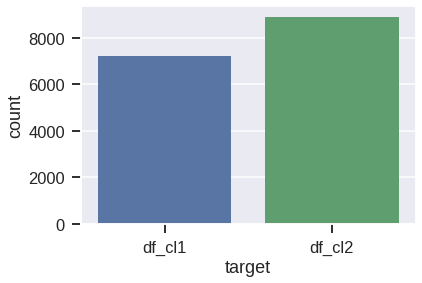

In [25]:
class_names = ['df_cl1', 'df_cl2']
ax = sns.countplot(x=df['target']); 
ax.set_xticklabels(class_names)
plt.show()

4. Balance the two classes using **under-sampling** as we learned in class.

In [26]:
# Balance two classes using undersampling
count_class_1 = len(tokens1)
df_cl2_under = df_cl2.sample(count_class_1)
df_under = pd.concat([df_cl1, df_cl2_under], axis=0)

In [27]:
df_under.describe

<bound method NDFrame.describe of                                                    text  target
0                            [Emma by Jane Austen 1816]     0.0
1      Emma Woodhouse, handsome, clever, and rich, w...     0.0
2     She was the youngest of the two daughters of a...     0.0
3     Her mother had died too long ago for her to ha...     0.0
4     Sixteen years had Miss Taylor been in Mr. Wood...     0.0
...                                                 ...     ...
2073  Third among the harpooneers was Daggoo, a giga...     1.0
5882  What tenderness there is in that preliminary  ...     1.0
8721          aye, tiny  mosses in these warped cracks.     1.0
8100  That was sudden, now; but squalls come sudden ...     1.0
7863  Next morning the not-yet-subsided sea rolled i...     1.0

[14448 rows x 2 columns]>

5. Make a bar-plot showing each class has the same number of samples for each author: Austen and Melville.


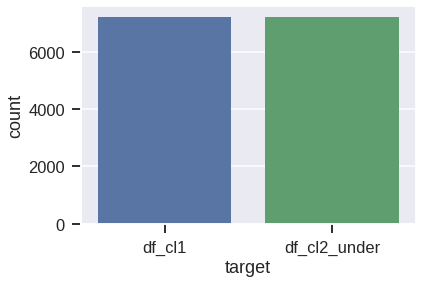

In [28]:
class_names = ['df_cl1', 'df_cl2_under']
ax = sns.countplot(x=df_under['target']); 
ax.set_xticklabels(class_names)
plt.show()

5. Clean the text in sentences.  Lower case, tokenize, remove stop words and punctuation.


In [29]:
#define function to convert raw text into tokens as detailed above
def convert_DF_token(text):
  output= " ".join(clean_word(text))
  return output

In [31]:
# cleaning/processing the text can take a few minutes
for idx, val in df_under.iterrows():
  text = val[0]
  val[0] = convert_DF_token(text)

In [32]:
df_under.describe

<bound method NDFrame.describe of                                                    text  target
0                            [Emma by Jane Austen 1816]     0.0
1      Emma Woodhouse, handsome, clever, and rich, w...     0.0
2     She was the youngest of the two daughters of a...     0.0
3     Her mother had died too long ago for her to ha...     0.0
4     Sixteen years had Miss Taylor been in Mr. Wood...     0.0
...                                                 ...     ...
2073  Third among the harpooneers was Daggoo, a giga...     1.0
5882  What tenderness there is in that preliminary  ...     1.0
8721          aye, tiny  mosses in these warped cracks.     1.0
8100  That was sudden, now; but squalls come sudden ...     1.0
7863  Next morning the not-yet-subsided sea rolled i...     1.0

[14448 rows x 2 columns]>

6. Use sklearn **train_test_split** to split the data into test and train data. Split the data with the following:
* 70% train and 30% test
* **random_state=325**.

<code>X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=.3, random_state=325)</code>

In [33]:
# splitting training data into train and test
X = df_under['text']
Y = df_under['target']
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=.3, random_state=325)

7. Using NLP techniques to find the features and classify the data using a Naive Bayes classifier, using **pipeline**.

In [34]:
#define pipeline
tfidf = TfidfVectorizer()
clf = MultinomialNB()
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()), #define our vectorizer
    ('clf', MultinomialNB()),      #define our classifier
])

#define parameters
parameters = {
    'tfidf__min_df': (0,   0.001),
    'tfidf__max_df': (0.5, 1.0),
    'tfidf__max_features': [1000, None],
    'tfidf__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
}

#use GridSearchCV
grid = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, cv=3);

In [35]:
start_time = time.time()
grid.fit(X_train,y_train);
print("GridSearch took %3.2f seconds " % (time.time() - start_time)) #took about 72s

Fitting 3 folds for each of 16 candidates, totalling 48 fits
GridSearch took 18.15 seconds 


8. Using the test set, evaluate the classifier's performance.  Display the confusion matrix for the test data.

In [36]:
# evaluate the performance and plot confusion matrix
print("Best Score: ", grid.best_score_)
print("Best Params: ", grid.best_params_)
model = grid.best_estimator_  #should already be trained/fit

y_pred=model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print("Accuracy : {} %".format(round(acc*100, 2)))

Best Score:  0.9297933353109858
Best Params:  {'tfidf__max_df': 1.0, 'tfidf__max_features': None, 'tfidf__min_df': 0.001, 'tfidf__ngram_range': (1, 1)}
Accuracy : 92.64 %


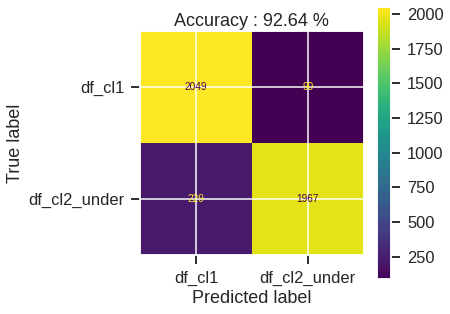

In [37]:
# plot the confusion matrix
fig,ax = plt.subplots(1,1,figsize=(5, 5))
cmd=ConfusionMatrixDisplay(cm, display_labels=class_names) 
cmd.plot(ax=ax)
plt.title("Accuracy : {} %".format(round(acc*100, 2)))
plt.show()

#### Classifier accuracy
What is the system's accuracy? Is it lower or higher than you expected?

your answer here

The accuracy is 92.64%. It is a bit lower than I expect since the best score is 0.9297933353109858, so I expect the accuracy is the same as the best score.

9. Find the most important features the classifier uses.

In [38]:
def getMostImportantFeaturesNB(clf,tfidf,N=20):
    feature_names = tfidf.get_feature_names()
    nclasses      = clf.feature_log_prob_.shape[0]
    features      = []
    for i in range(nclasses):
        feature_prob  = (clf.feature_log_prob_[i]) #class i
        indices       = np.argsort(np.abs(feature_prob))[::-1]
        features_i    = []
        for j in range(N):
            features_i.append(feature_names[indices[j]])
        features.append(features_i)
    for i in range(nclasses):
        print("class %d important features"%i)
        print(features[i])

In [39]:
tfidf        = TfidfVectorizer(min_df=0.001)
tfidf.fit(X_train);
X_train_vec  = tfidf.transform(X_train).toarray()
X_train_vec.shape

clf = MultinomialNB()
clf.fit(X_train_vec, y_train);

getMostImportantFeaturesNB(clf=clf, tfidf=tfidf)

class 0 important features
['leaped', 'mate', 'mariners', 'strangely', 'stricken', 'foam', 'flying', 'stubb', 'flukes', 'floating', 'flask', 'fishery', 'fishermen', 'mass', 'finally', 'fin', 'mast', 'surface', 'fiery', 'masts']
class 1 important features
['_her_', 'enscombe', 'elegance', 'elton', 'eltons', 'emma', 'encouragement', 'engagement', 'enjoyment', 'fairfax', 'donwell', 'farther', 'ford', 'fortnight', 'fortunate', 'goddard', 'gratified', 'gratitude', 'tired', 'dixon']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


your answer here

class 0 important features:

['leaped', 'mate', 'mariners', 'strangely', 'stricken', 'foam', 'flying', 'stubb', 'flukes', 'floating', 'flask', 'fishery', 'fishermen', 'mass', 'finally', 'fin', 'mast', 'surface', 'fiery', 'masts']


class 1 important features:

['_her_', 'enscombe', 'elegance', 'elton', 'eltons', 'emma', 'encouragement', 'engagement', 'enjoyment', 'fairfax', 'donwell', 'farther', 'ford', 'fortnight', 'fortunate', 'goddard', 'gratified', 'gratitude', 'tired', 'dixon']

# Exercise 5

Make a function **whoSaidIt** based on **findSentiment** ( as we did in class ) that can determine the author of a user supplied sentence.  

Test it out with the sentences below.

In [40]:
X = df_under['text']
Y = df_under['target']
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=.3, random_state=325)

tfidf = TfidfVectorizer(min_df=0.001)
tfidf.fit(X_train);
X_train_vec  = tfidf.transform(X_train).toarray()
print(f'X_train_vec.shape: {X_train_vec.shape}')

clf = MultinomialNB()
clf.fit(X_train_vec, y_train);

X_train_vec.shape: (10113, 1900)


In [41]:
def whoSaidIt(quotes, tfidf, clf):
  clean_text = [" ".join(clean_word(rt)) for rt in quotes] #important to prepare data the same way
  tfs_vecs   = tfidf.transform(clean_text) #must just be transform, don't re-fit
  tfidf_data = tfs_vecs.toarray()
  y_pred     = clf.predict(tfidf_data)
  y_class    = ['Melville' if y==1 else 'Austen' for y in y_pred  ]
  y_prob     = clf.predict_proba(tfidf_data)
  out        = [(c,round(p.max(),4)) for c,p in zip(y_class,y_prob)]   #get class and probability
  for o in out:
      print(o)
  


In [42]:
#quotes by each author,
quote1="The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid."
quote2="There is nothing I would not do for those who are really my friends. I have no notion of loving people by halves, it is not my nature."
quote3="It is not down in any map; true places never are."
quote4="We cannot live only for ourselves. A thousand fibers connect us with our fellow men."
quotes=[quote1,quote2,quote3,quote4]

In [43]:
whoSaidIt(quotes, tfidf=tfidf, clf=clf)

('Austen', 0.9798)
('Austen', 0.9208)
('Austen', 0.5568)
('Melville', 0.8887)


#### How did your model do?  Did your model correctly classify these quotes?

It uses the similarities between the training data and the quote to classify whose quote is that